In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
preproc_folder = "enriched_time"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
output_path = "../data/models/"

prefix = 'time_2018-02-20_p180_bg_'
postfix = '_190721_170'
trainfile = '_traindata'
testfile = '_testdata'

[X_train, y_train, feature_labels] = pd.read_pickle(datafolder+prefix+trainfile+postfix+'.pkl') 
[X_test, y_test, feature_labels] = pd.read_pickle(datafolder+prefix+testfile+postfix+'.pkl')

In [3]:
def rolling_window(T, ntrain, ntest):
    Nsteps = (T - ntrain) // ntest #rounded down number of folds
    starti = 0 #running first index of training set
    
    for count in range(Nsteps):
        traini = np.array(range(starti, T - (Nsteps-count)*ntest)) #may be longer than ntrain for count==0
        testi = np.array(range(T - (Nsteps-count)*ntest, T - (Nsteps-count)*ntest + ntest))
        starti = T - (Nsteps-count-1)*ntest - ntrain
        yield count, traini, testi, Nsteps

In [4]:
X_train.shape

(42079, 35)

-Loading preprocessed data...
training files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__traindata_190721_170.pkl
testing files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__testdata_190721_170.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_8 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_9 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                1380      
____________

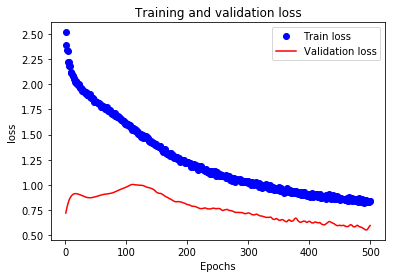

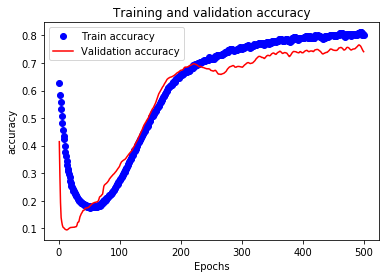

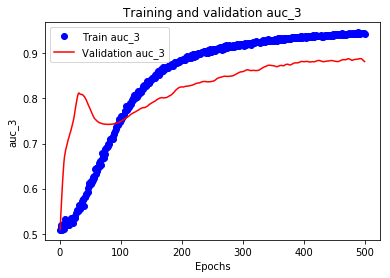

Prediction performance on 8000 observations from validation set using holdout
Confusion matrix: 
[[0.74428 0.25572]
 [0.01096 0.08538]]
AUC 0.882

Retraining the model using the full training set for proper testing...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_13 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1380      
__________________________________

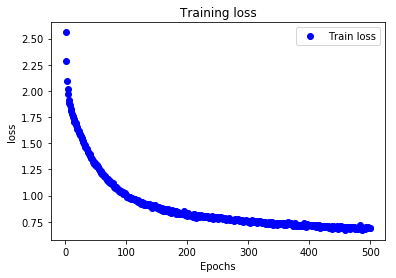

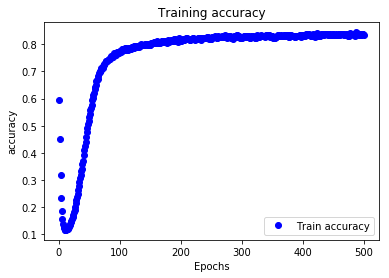

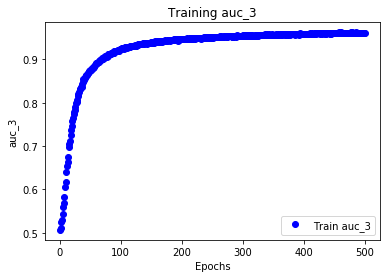

- Saving the model to ../data/models/test_mlp/...
Saving model to ../data/models/test_mlp/time_2018-02-20_p180_bg__sequential_2_19081_745.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.84812 0.15188]
 [0.00168 0.00181]]
AUC 0.828
Confusion matrix:
[[13134  2352]
 [   26    28]]
Saving dictionary to ../data/viz_data/test_mlp/time_2018-02-20_p180_bg__sequential_2_19081_745_viz.pkl


In [7]:
experiment = mlp_exp(datafolder, prefix, postfix, experiment_name='test_mlp', 
                     hidden_layers_no=4, hidden_nodes=[70, 45,30,15],
                     optimizer=Adam(0.001),
                     hl_activations=[tf.nn.relu]*4, dropout=[0.5]*4, 
                     loss_func = tf.keras.losses.BinaryCrossentropy(),
                     validation_size=8000,
                     metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                     to_monitor=('accuracy', 0.9),
                     validation_mode='endpoint',
                     validation_ep=True,
                     epochs=500, 
                     batch_size=X_train.shape[0]-8000,
                     use_batch_and_steps=True,
                     class_1_weight=25,
                     retrain_for_testing=True,
                     pred_threshold = 0.55,
                     early_stopping=True, 
                     save_model=True, 
                     save_results_for_viz=True,
                     mlf_tracking=False)